<a href="https://colab.research.google.com/github/sugey-gi/edp1/blob/main/Integrar_de_fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

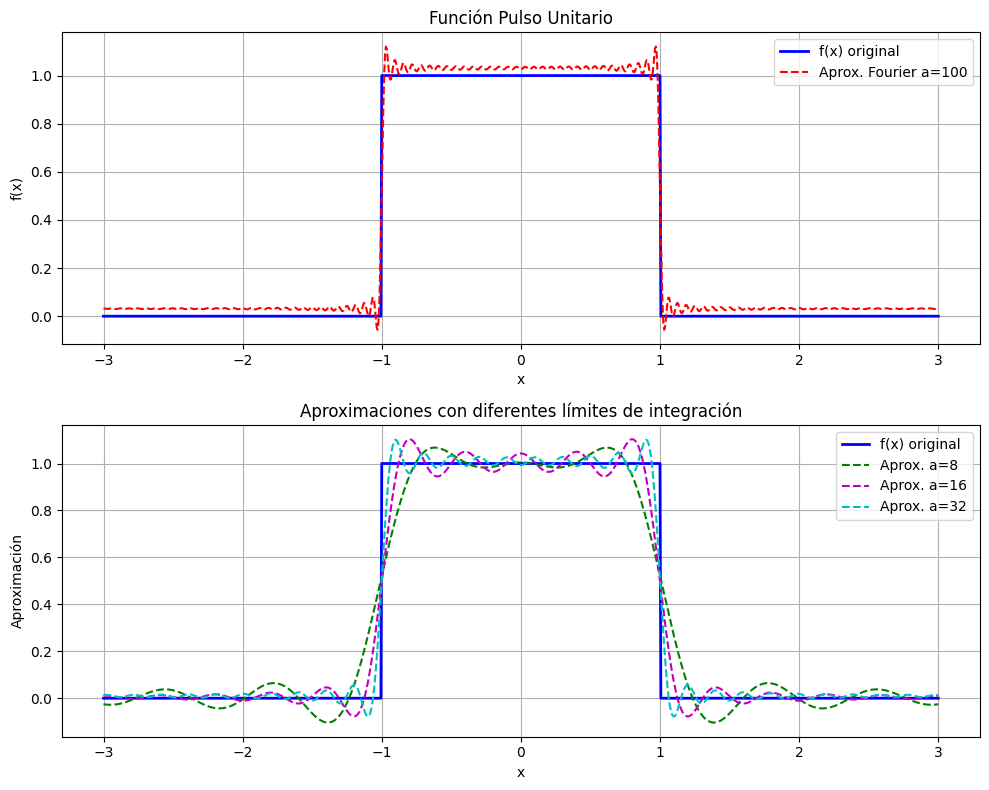

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# Parte A: Función original
# ---------------------------

def pulso_unitario(x):
    return np.where(np.abs(x) <= 1, 1, 0)

# Rango de x
x_vals = np.linspace(-3, 3, 1000)
f_vals = pulso_unitario(x_vals)

# Gráfico función original
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.plot(x_vals, f_vals, 'b-', linewidth=2, label='f(x) original')
plt.title('Función Pulso Unitario')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()

# ---------------------------
# Parte B: Aproximación con integral de Fourier
# ---------------------------

# A(w) = 2*sin(w)/(pi*w)
def A(omega):
    return 2 * np.sin(omega) / (np.pi * omega)

# Manejar división por cero con límite (l'Hôpital)
def A_safe(omega):
    return np.where(omega == 0, 2 / np.pi, A(omega))

# Aproximación de la integral de Fourier
def fourier_aprox(x, a_max, n=1000):
    omega = np.linspace(0.001, a_max, n)  # evitar ω=0 exacto
    dω = omega[1] - omega[0]
    result = []
    for xi in x:
        integrando = A_safe(omega) * np.cos(omega * xi)
        integral = np.sum(integrando) * dω
        result.append(integral)
    return np.array(result)

# Aproximar con a=100
f_aprox_100 = fourier_aprox(x_vals, a_max=100)

# Graficar sobre la original
plt.plot(x_vals, f_aprox_100, 'r--', label='Aprox. Fourier a=100')
plt.legend()

# ---------------------------
# Parte C: Varios valores de a
# ---------------------------

plt.subplot(2, 1, 2)
plt.plot(x_vals, f_vals, 'b-', linewidth=2, label='f(x) original')

valores_a = [8, 16, 32]
colores = ['g', 'm', 'c']

for a_val, color in zip(valores_a, colores):
    f_aprox = fourier_aprox(x_vals, a_max=a_val)
    plt.plot(x_vals, f_aprox, '--', color=color, linewidth=1.5, label=f'Aprox. a={a_val}')

plt.title('Aproximaciones con diferentes límites de integración')
plt.xlabel('x')
plt.ylabel('Aproximación')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()